# **About Dataset**
**Shop Customer Data** is a comprehensive dataset that provides a **detailed analysis** of a **hypothetical shop's ideal customers**. By collecting and analyzing customer data through **membership cards**, this dataset provides valuable insights that can help a **business better understand its customers**.

The dataset includes **2000 records and 8 columns**, providing a **wealth of information** about the **shop's customer base**. Each column represents a specific aspect of the customer's profile, including their **unique Customer ID, Gender, Age, Annual Income, Spending Score, Profession, Work Experience, and Family Size.**

By analyzing this data, businesses can gain **valuable insights** into their **customers' preferences**, **behaviors, and purchasing habits**. For example, they can **segment customers** by **age, income, or family size** to better understand how these factors impact their purchasing decisions.

<table>
  <thead>
    <tr>
      <th>Feature</th>
      <th>Description</th>
      <th>Data Type</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Customer ID</td>
      <td>A unique identifier assigned to each customer in the dataset. It is used to differentiate between individual customers and to keep track of their behaviors.</td>
      <td>Categorical</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the customer, either male or female. Gender can be used to analyze purchasing behavior and preferences between genders.</td>
      <td>Categorical</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the customer, usually measured in years. Age can be used to segment customers into different age groups for analyzing purchasing patterns.</td>
      <td>Numeric</td>
    </tr>
    <tr>
      <td>Annual Income</td>
      <td>The annual income of the customer, usually measured in dollars or another currency. Income can be used to segment customers into different income groups.</td>
      <td>Numeric</td>
    </tr>
    <tr>
      <td>Spending Score</td>
      <td>A score assigned by the shop based on the customer's behavior and spending nature. It helps in segmenting customers based on their purchasing patterns.</td>
      <td>Numeric</td>
    </tr>
    <tr>
      <td>Profession</td>
      <td>The occupation or profession of the customer. Profession can be used to analyze purchasing patterns and preferences among different professions.</td>
      <td>Categorical</td>
    </tr>
    <tr>
      <td>Work Experience</td>
      <td>The number of years of work experience of the customer. It can help in segmenting customers based on their level of experience for analyzing purchasing patterns.</td>
      <td>Numeric</td>
    </tr>
    <tr>
      <td>Family Size</td>
      <td>The size of the customer's family, usually measured in terms of the number of family members. Family size can be used to analyze purchasing patterns.</td>
      <td>Numeric</td>
    </tr>
  </tbody>
</table>


# **Set Up**

\# hidden set up
 <!-- %pip install fuzzy_c_means  -->
 <!-- %pip install plotly -->

# **Importing Libraries**

In [273]:
# Data
import numpy as np
import pandas as pd

# Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns
# Data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


# Clustering Models
from fcmeans import FCM
from sklearn.decomposition import PCA


# **Data Loading**
---

In [274]:
df = pd.read_csv("Customers.csv") 
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


Let's have a look at the **feature space**.

# **Data Cleaning**
---

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [276]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

#### Input the missing value by the Mode Value

In [277]:

df.Profession.fillna('mode', inplace=True)
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

In [278]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [279]:
# Calculate the mean age for entries with age greater than or equal to 15
mean_age_greater_than_15 = df[df['Age'] >= 15]['Age'].mean()

# Fill missing values in 'Age' for entries with age less than 15 with the calculated mean
df.loc[df['Age'] < 15, 'Age'] = mean_age_greater_than_15


In [280]:
df.rename(columns={ 'Annual Income ($)' : 'Annual Income','Spending Score (1-100)':'Spending Score'}, inplace = True)
df

,CustomerID,Gender,Age,Annual Income,Spending Score,Profession,Work Experience,Family Size
0,1,Male,19.0,15000,39,Healthcare,1,4
1,2,Male,21.0,35000,81,Engineer,3,3
2,3,Female,20.0,86000,6,Engineer,1,1
3,4,Female,23.0,59000,77,Lawyer,0,2
4,5,Female,31.0,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71.0,184387,40,Artist,8,7
1996,1997,Female,91.0,73158,32,Doctor,7,7
1997,1998,Male,87.0,90961,14,Healthcare,9,2
1998,1999,Male,77.0,182109,4,Executive,7,2


# **Data Preprocessing**
The following steps are applied to preprocess the data:

* Label encoding the categorical features
* Scaling the features using the standard scaler
* Creating a subset dataframe for dimensionality reduction

#### Dropping Unesissary colums

In [281]:
df.drop(columns=['CustomerID'], inplace=True) # because it is Unrelavent
columns = df.columns
columns

Index(['Gender', 'Age', 'Annual Income', 'Spending Score', 'Profession',
       'Work Experience', 'Family Size'],
      dtype='object')

#### Label encoding
- Label encoding is a technique used to convert categorical variables into numerical values. It assigns a unique numeric label to each unique category in a column. 
- This is useful when working with machine learning algorithms that require numerical input, as they typically cannot directly process categorical data.

In [282]:
categorical_columns = ['Gender', 'Profession']
for cat_col in categorical_columns:
    encoder = LabelEncoder()
    df[cat_col] = encoder.fit_transform(df[cat_col])
    
df

,Gender,Age,Annual Income,Spending Score,Profession,Work Experience,Family Size
0,1,19.0,15000,39,5,1,4
1,1,21.0,35000,81,2,3,3
2,0,20.0,86000,6,2,1,1
3,0,23.0,59000,77,7,0,2
4,0,31.0,38000,40,3,2,6
...,...,...,...,...,...,...,...
1995,0,71.0,184387,40,0,8,7
1996,0,91.0,73158,32,1,7,7
1997,1,87.0,90961,14,5,9,2
1998,1,77.0,182109,4,4,7,2


#### Data Correlation Analysis

<AxesSubplot:>

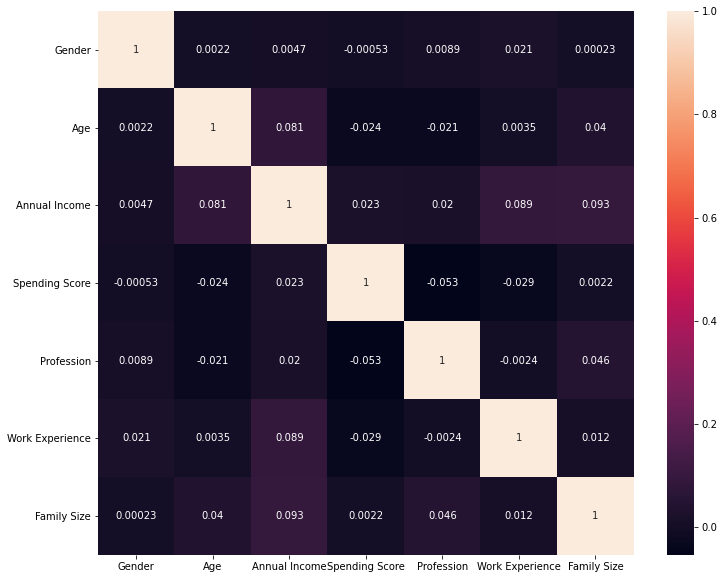

In [283]:
fig=plt.figure(figsize=(12,10))
sns.heatmap(df.corr( ),annot=True)

####  Scaling the features using the standard scaler

In [284]:
# df = df.sample(n=200, random_state=42)
dn = df
data=df.copy()
scaler = StandardScaler()
scaler.fit(dn)
scaled_dn = pd.DataFrame(scaler.transform(dn),columns= dn.columns )
scaled_dn

,Gender,Age,Annual Income,Spending Score,Profession,Work Experience,Family Size
0,1.207064,-1.602614,-2.093501,-0.428339,0.778356,-0.791207,0.117497
1,1.207064,-1.515161,-1.656133,1.075546,-0.354347,-0.281162,-0.390051
2,-0.828457,-1.558887,-0.540845,-1.609962,-0.354347,-0.791207,-1.405148
3,-0.828457,-1.427707,-1.131292,0.932319,1.533491,-1.046230,-0.897599
4,-0.828457,-1.077893,-1.590528,-0.392532,0.023220,-0.536185,1.132594
...,...,...,...,...,...,...,...
1995,-0.828457,0.671178,1.610720,-0.392532,-1.109483,0.993950,1.640142
1996,-0.828457,1.545714,-0.821679,-0.678986,-0.731915,0.738928,1.640142
1997,1.207064,1.370806,-0.432356,-1.323508,0.778356,1.248972,-0.897599
1998,1.207064,0.933539,1.560904,-1.681576,0.400788,0.738928,-0.897599


# **Dimensionality Reduction**
Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables


* Dimensionality reduction with PCA
* Plotting the reduced dataframe

In [285]:
# Dimensionality reduction with PCA and use 3 to capture the most variance in data set 
pca = PCA(n_components=3)
pca.fit(scaled_dn)
PCA_ds = pd.DataFrame(pca.transform(scaled_dn), columns=(["col1","col2", "col3",]))
# PCA_ds.describe().T
individual_explained_variance = pca.explained_variance_
print(f"variance of individuals: {individual_explained_variance}")
PCA_ds

variance of individuals: [1.17868414 1.056769   1.0198974 ]


,col1,col2,col3
0,1.958000,1.694130,0.200227
1,2.019325,-0.190283,0.799117
2,1.959600,1.083079,0.154330
3,1.997830,0.834128,-1.058393
4,1.120034,0.799441,-1.091662
...,...,...,...
1995,-2.257339,-0.946436,-0.257895
1996,-1.040719,-0.207438,-0.660431
1997,-0.634911,1.279621,1.619805
1998,-1.504347,0.937367,1.542087


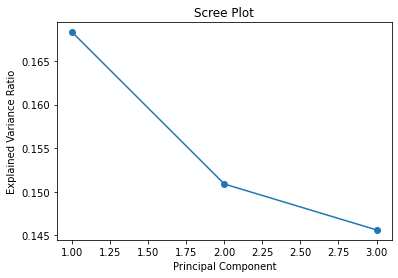

In [286]:
# Plot scree plot
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()


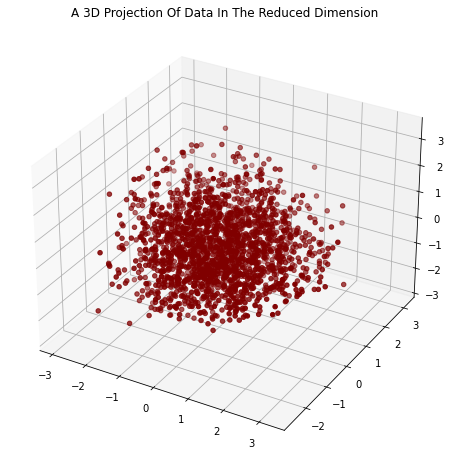

In [287]:
#A 3D Projection Of Data In The Reduced Dimension  before any clustering 
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# **Fuzzy C-Means Clustering**

In [288]:
# Create and fit the FCM model with Manhattan distance

c =5
fcmModel_manhattan = FCM(n_clusters=c, distance_metric='cityblock')
fcmModel_manhattan.fit(PCA_ds.values)

# Get the centroids for the Manhattan distance FCM model
centers_manhattan = fcmModel_manhattan.centers

# Create and fit the FCM model with Euclidean distance
fcmModel_euclidean = FCM(n_clusters=c, distance_metric='euclidean')
fcmModel_euclidean.fit(PCA_ds.values)

# Get the centroids for the Euclidean distance FCM model
centers_euclidean = fcmModel_euclidean.centers


In [289]:
pred_M = fcmModel_manhattan.predict(PCA_ds.values)
print('Predicted Value for Manhatten fcmModel is : ' , pred_M)
pred_M.shape

print(pred_M)

#===================================================================

pred_E = fcmModel_euclidean.predict(PCA_ds.values)
print('Predicted Value for Manhatten fcmModel is : ' , pred_E)

pred_E.shape
print(pred_E)

Predicted Value for Manhatten fcmModel is :  [1 3 1 ... 2 2 2]
[1 3 1 ... 2 2 2]
Predicted Value for Manhatten fcmModel is :  [1 0 1 ... 3 3 3]
[1 0 1 ... 3 3 3]


In [298]:
# add the cluster column to the dataframe 
pca_dsm=PCA_ds.copy()
PCA_ds['Clusters'] = pred_E
pca_dsm['Clusters']=pred_M
dfm=df.copy()
dfm["Clusters"]=pred_M
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]=pred_E
PCA_ds

,col1,col2,col3,Clusters
0,1.958000,1.694130,0.200227,1
1,2.019325,-0.190283,0.799117,0
2,1.959600,1.083079,0.154330,1
3,1.997830,0.834128,-1.058393,0
4,1.120034,0.799441,-1.091662,1
...,...,...,...,...
1995,-2.257339,-0.946436,-0.257895,4
1996,-1.040719,-0.207438,-0.660431,2
1997,-0.634911,1.279621,1.619805,3
1998,-1.504347,0.937367,1.542087,3


# **Visualization**

Use scatter to
* Show Cluster Overlap
* Identifying Cluster Patterns: shape, density, and arrangement of the data points within each cluster

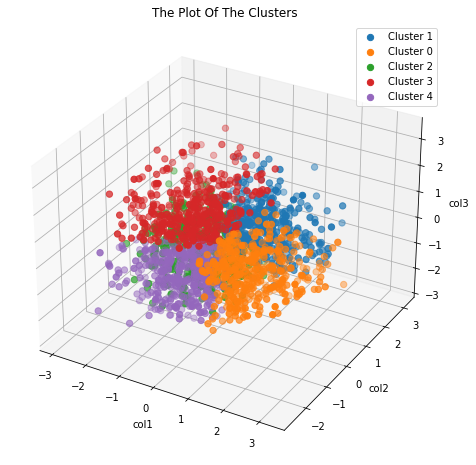

In [304]:


fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='3d')

# Plot each cluster separately and assign a label for the legend
for cluster_label in PCA_ds['Clusters'].unique():
    cluster_data = PCA_ds[PCA_ds['Clusters'] == cluster_label]
    ax.scatter(cluster_data['col1'], cluster_data['col2'], cluster_data['col3'], s=40, label=f'Cluster {cluster_label}')

ax.set_title("The Plot Of The Clusters")
ax.set_xlabel('col1')
ax.set_ylabel('col2')
ax.set_zlabel('col3')

# Add a legend
ax.legend()

plt.show()


## Using Manhattan:Manhattan distance is less sensitive to outliers and differences in scale compared to Euclidean distance.

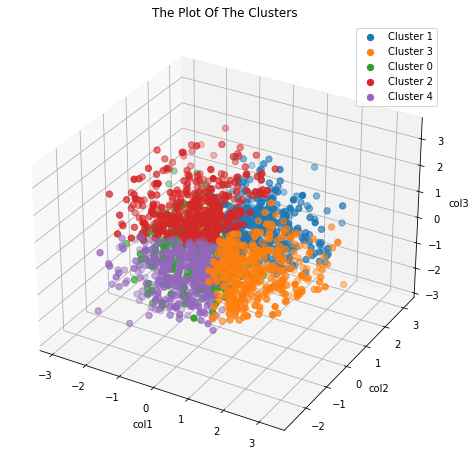

In [305]:
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='3d')

# Plot each cluster separately and assign a label for the legend
for cluster_label in pca_dsm['Clusters'].unique():
    cluster_data = pca_dsm[pca_dsm['Clusters'] == cluster_label]
    ax.scatter(cluster_data['col1'], cluster_data['col2'], cluster_data['col3'], s=40, label=f'Cluster {cluster_label}')

ax.set_title("The Plot Of The Clusters")
ax.set_xlabel('col1')
ax.set_ylabel('col2')
ax.set_zlabel('col3')

# Add a legend
ax.legend()

plt.show()

# **Model Evaluation And Visualization**

No handles with labels found to put in legend.


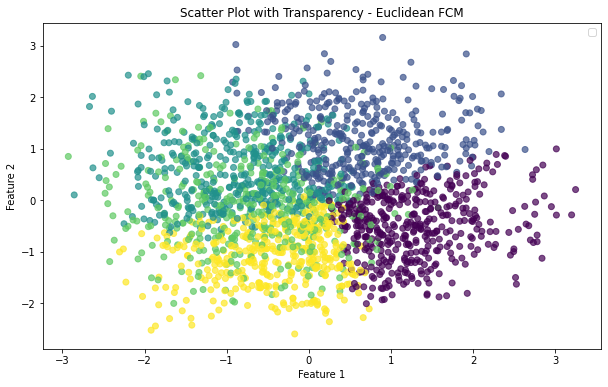

In [302]:
# Visualization 4: Scatter Plot with Transparency
plt.figure(figsize=(10, 6))
plt.scatter(PCA_ds.iloc[:, 0], PCA_ds.iloc[:, 1], c=PCA_ds["Clusters"], cmap="viridis", alpha=0.7)
plt.title('Scatter Plot with Transparency - Euclidean FCM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Using Manhhatn 

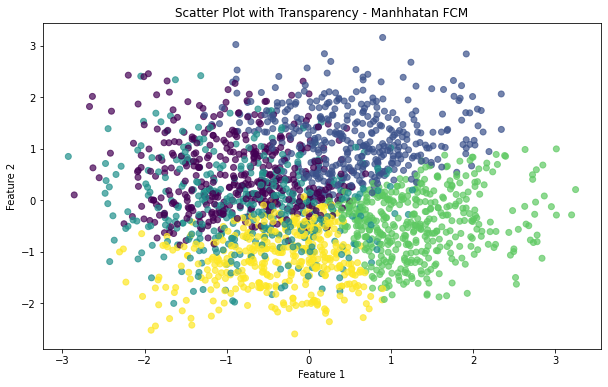

In [299]:
# Visualization 4: Scatter Plot with Transparency
plt.figure(figsize=(10, 6))
plt.scatter(pca_dsm.iloc[:, 0], pca_dsm.iloc[:, 1], c=pca_dsm["Clusters"], cmap="viridis", alpha=0.7)
plt.title('Scatter Plot with Transparency - Manhhatan FCM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Firstly, let us have a look at the group distribution of clustring

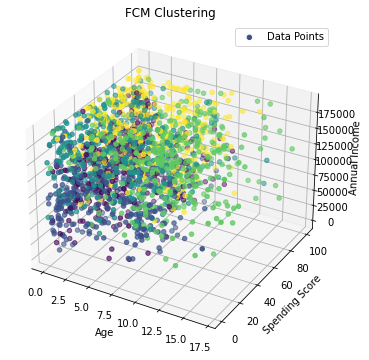

In [295]:

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with cluster assignments for FCM model
scatter = ax.scatter(df['Work Experience'], df['Spending Score'], df['Annual Income'], c=df["Clusters"])


# Set labels and title
ax.set_xlabel('Work Experience')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Annual Income')
ax.set_title('FCM Clustering')

# Add a legend
ax.legend([scatter], ['Data Points'], loc='upper right')

plt.show()


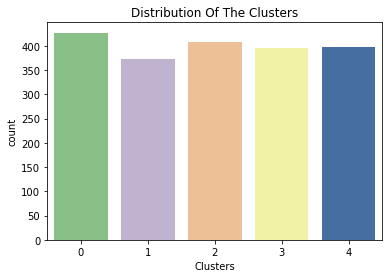

In [296]:
#Plotting countplot of clusters
# pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters"], palette= 'Accent')
pl.set_title("Distribution Of The Clusters")
plt.show()

The clusters seem to be fairly distributed.

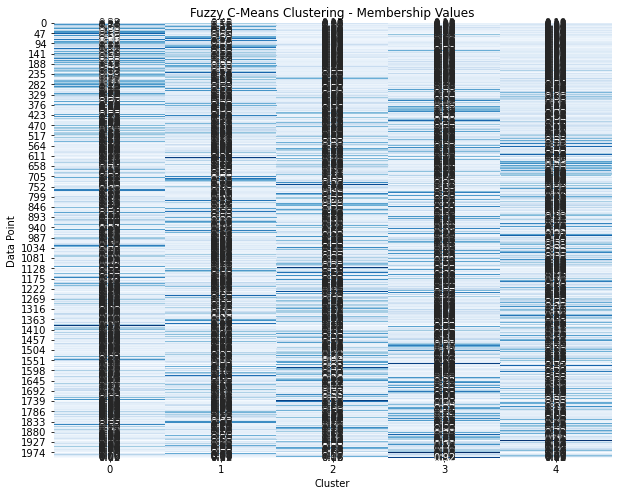

In [297]:
import seaborn as sns
import matplotlib.pyplot as plt

# membership_matrix is a 2D array where each row represents a data point and each column represents the membership value for a cluster

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(fcmModel_euclidean.u, cmap='Blues', annot=True, fmt=".2f", cbar=False)

# Set axis labels and title
plt.xlabel('Cluster')
plt.ylabel('Data Point')
plt.title('Fuzzy C-Means Clustering - Membership Values')

# Show the heatmap
plt.show()

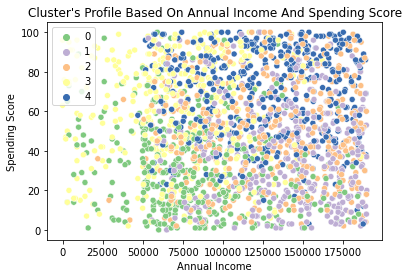

In [270]:
pl = sns.scatterplot(data = df,x=df["Annual Income"], y=df["Spending Score"],hue=df["Clusters"], palette= 'Accent')
pl.set_title("Cluster's Profile Based On Annual Income And Spending Score")
plt.legend()
plt.show()



Annual Income vs  Spending Score plot shows the clusters pattern
* group 0: not high spending & low to average income
* group 1: low to average spending &  average to high income
* group 2: average to high spending & average to high income
* group 3: low to high spending & average to high income
* group 4: low to high spending & average  income

d:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 26.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.7% of the points cannot be placed; you may want to decrease the size of the 

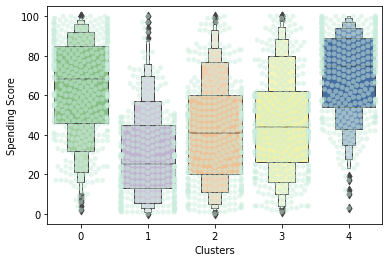

In [306]:
# Swarm Plot (sns.swarmplot):

# The swarm plot is used to show individual data points along the categorical axis (in this case, the clusters).
# Each point in the swarm plot represents a data point from the "Spending Score" variable for a specific cluster.
# The points are spread out to avoid overlap, providing a clear view of the distribution of individual data points.
# Boxen Plot (sns.boxenplot):

# The boxen plot (also known as a letter-value plot) is a variation of a box plot that provides additional information about the shape of the distribution.
# It includes vertical lines, called "steps," that extend from the boxes to represent the density of data points.
# The width of the steps indicates the relative density of data points at different values of the "Spending Score" within each cluster.

# Visualization:
# By combining the swarm plot and boxen plot for each cluster, this visualization allows you to understand the distribution
# of "Spending Score" within each cluster. It provides insights into the central tendency, spread, and density of the data points.

plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Spending Score"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Spending Score"], palette='Accent')
plt.show()

From the above plot, it can be clearly seen how much clusters' customers spend .

# **Profiling the Clusters**

Histograms are commonly used for profiling clusters because they provide a visual representation of the distribution of a particular feature within each cluster

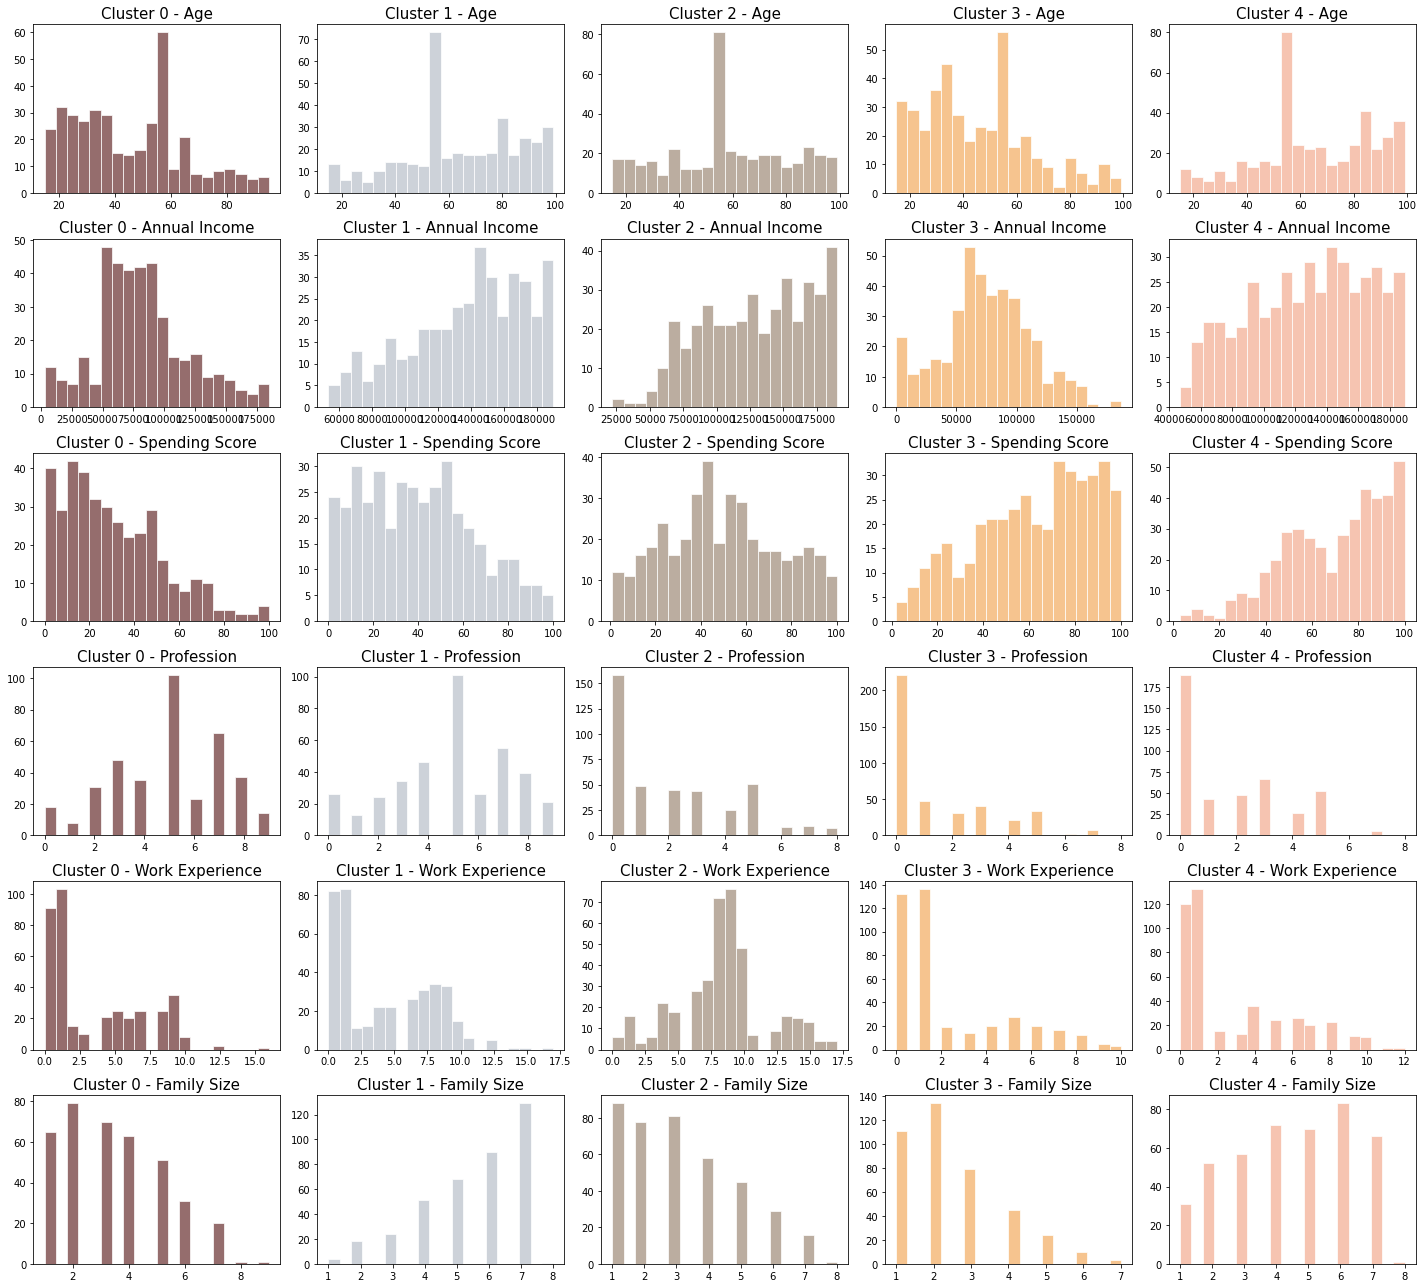

In [272]:
# Plot histograms for each feature segmented by the clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60","#F3AB90"]
features = df.columns[1:-1]
clusters = df['Clusters'].unique()
clusters.sort()

# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Plotting histograms
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = df[df['Clusters'] == cluster][feature]
        axes[i, j].hist(data, bins=20, color=pal[j], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()

#### Cluster 0
* The majorty of Customers in this cluster have low work experience
* They have not high spending score & low to average income
#### Cluster 1
* The majorty of customers of this cluster are not old peopel 
* They do not spend to much 
#### Cluster 2
* The majorty of customers of this cluster have high income
#### Cluster 3
* The majorty of Customers of this cluster have low work experience
* The majorty of Cutomers are not teenagers 
#### Cluster 4
* The majorty of Customers of this cluster have low work experience
* They majorly works as healthcare
* They have average to high spending score 